# Projeto 02 - Análise de Estatística Descritiva

In [1]:
import nltk
from nltk.corpus import machado

nltk.download('machado')

[nltk_data] Downloading package machado to /root/nltk_data...


True

In [2]:
import zipfile

caminho_do_zip = '/root/nltk_data/corpora/machado.zip'

#'r' - read
arquivo_zip = zipfile.ZipFile(caminho_do_zip, 'r')
#visualizar conteudo
arquivo_zip.printdir()

File Name                                             Modified             Size
machado/                                       2009-11-07 17:15:34            0
machado/CONTENTS                               2009-11-07 17:01:42         7414
machado/contos/                                2009-11-07 00:29:12            0
machado/contos/macn001.txt                     2009-11-07 00:27:08       325777
machado/contos/macn002.txt                     2009-11-07 00:27:08       263696
machado/contos/macn003.txt                     2009-11-07 00:27:10       319473
machado/contos/macn004.txt                     2009-11-07 00:27:10       294593
machado/contos/macn005.txt                     2009-11-07 00:27:10       253555
machado/contos/macn006.txt                     2009-11-07 00:27:10       130664
machado/contos/macn007.txt                     2009-11-07 00:27:12       169880
machado/contos/macn008.txt                     2009-11-07 00:27:12         3936
machado/contos/macn009.txt              

In [3]:
#extrair o conteudo para analizar
import os

pasta_destino = '/root/nltk_data/corpora/'

os.makedirs(pasta_destino, exist_ok=True)

arquivo_zip.extractall(pasta_destino)
print(f"Arquivo {caminho_do_zip} extraido com sucesso na pasta {pasta_destino}")

Arquivo /root/nltk_data/corpora/machado.zip extraido com sucesso na pasta /root/nltk_data/corpora/


##Passo 2 - Etiquetação morfologica


##Exemplo 1 - NER con spaCy

In [19]:
import spacy

# Carrega o modelo de português
nlp = spacy.load("pt_core_news_sm")

# Texto de exemplo
texto = "Elon Musk, CEO da Tesla, visitou o Brasil em maio de 2022 para discutir investimentos de R$ 5 bilhões."

# Processa o texto
doc = nlp(texto)

# Imprime as entidades identificadas
for entidade in doc.ents:
    print(f"{entidade.text} - {entidade.label_}")

Elon Musk - LOC
Tesla - ORG
Brasil - LOC
R$ - MISC


##Exemplo 02 - NER com NLTK

In [23]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# Baixar pacotes necessários
nltk.download('punkt_tab')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')

# Texto de exemplo
texto = "Barack Obama foi presidente dos Estados Unidos e ganhou o Prêmio Nobel da Paz."

# Tokenização e POS tagging
tokens = word_tokenize(texto)
tags = pos_tag(tokens)

# Identificação de entidades
entidades = ne_chunk(tags)

# Exibir as entidades reconhecidas
print(entidades)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


(S
  (PERSON Barack/NNP)
  (ORGANIZATION Obama/NNP)
  foi/NN
  presidente/NN
  dos/NN
  (PERSON Estados/NNP Unidos/NNP)
  e/NN
  ganhou/NN
  o/NN
  (PERSON Prêmio/NNP Nobel/NNP)
  da/NN
  Paz/NNP
  ./.)


## Exemplo 03 - Extração de Informações com Expressões Regulares

In [24]:
import re

texto = "O pagamento deve ser feito até 30 de junho de 2025."

# Expressão regular para encontrar datas
padrao = r"\d{1,2} de [a-zA-Z]+ de \d{4}"
datas = re.findall(padrao, texto)

print(datas)

['30 de junho de 2025']


## Exemplo 04 - Extração de informação com Regras heurísticas e Dicionários

In [25]:
profissoes = ["engenheiro", "cientista de dados", "médico", "advogado"]

texto = "João é engenheiro de software e trabalha na Tesla."

for profissao in profissoes:
    if profissao in texto:
        print(f"Profissão identificada: {profissao}")

Profissão identificada: engenheiro


## Exemplo 05 - Mineração de Textos com Frequência de Palavras e N-gramas

In [26]:
import nltk
from nltk.util import ngrams
from collections import Counter

texto = "Mineração de textos envolve análise de palavras, palavras importantes e padrões."
palavras = nltk.word_tokenize(texto.lower())

frequencia = Counter(palavras)
print(frequencia.most_common(5))  # Top 5 palavras mais frequentes

bigrams = list(ngrams(palavras, 2))
print(bigrams)

[('de', 2), ('palavras', 2), ('mineração', 1), ('textos', 1), ('envolve', 1)]
[('mineração', 'de'), ('de', 'textos'), ('textos', 'envolve'), ('envolve', 'análise'), ('análise', 'de'), ('de', 'palavras'), ('palavras', ','), (',', 'palavras'), ('palavras', 'importantes'), ('importantes', 'e'), ('e', 'padrões'), ('padrões', '.')]


## Exemplo 06 - Mineração de Texto

In [29]:
!pip install gensim
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [1]:
from gensim import corpora, models

# Texto de exemplo
documentos = [["mineração", "textos", "dados"],
              ["inteligência", "artificial", "aprendizado"],
              ["dados", "aprendizado", "estatística"]]

# Criar dicionário e corpus
dicionario = corpora.Dictionary(documentos)
corpus = [dicionario.doc2bow(texto) for texto in documentos]

# Aplicar LDA
lda_modelo = models.LdaModel(corpus, num_topics=2, id2word=dicionario)
print(lda_modelo.print_topics())

[(0, '0.215*"dados" + 0.189*"mineração" + 0.187*"textos" + 0.113*"aprendizado" + 0.103*"inteligência" + 0.100*"estatística" + 0.094*"artificial"'), (1, '0.247*"aprendizado" + 0.166*"dados" + 0.150*"artificial" + 0.145*"estatística" + 0.143*"inteligência" + 0.076*"textos" + 0.074*"mineração"')]


In [14]:
# define a leitura dos arquivos
def ler(nome_arquivo):
  arquivo = open(nome_arquivo, 'r', encoding='iso-8859-1')
  conteudo_arq = arquivo.read()
  arquivo.close()
  return conteudo_arq

In [15]:
#Obtendo arquivos para análise
obras = []

for i in range(1, 6):
  obras.append('/root/nltk_data/corpora/machado/romance/marm0' + str(i) + '.txt')

for i in range(1, 6):
  obras.append('/root/nltk_data/corpora/machado/cronica/macr0' + str(i) + '.txt')

obras

['/root/nltk_data/corpora/machado/romance/marm01.txt',
 '/root/nltk_data/corpora/machado/romance/marm02.txt',
 '/root/nltk_data/corpora/machado/romance/marm03.txt',
 '/root/nltk_data/corpora/machado/romance/marm04.txt',
 '/root/nltk_data/corpora/machado/romance/marm05.txt',
 '/root/nltk_data/corpora/machado/cronica/macr01.txt',
 '/root/nltk_data/corpora/machado/cronica/macr02.txt',
 '/root/nltk_data/corpora/machado/cronica/macr03.txt',
 '/root/nltk_data/corpora/machado/cronica/macr04.txt',
 '/root/nltk_data/corpora/machado/cronica/macr05.txt']

In [19]:
import spacy
nlp = spacy.load("pt_core_news_sm")

import statistics as stat

cont_adv = []

for obra in obras:
  print(obra)

  s = ler(obra)
  doc = nlp(s)
  etiq = [(x.orth_, x.pos_) for x in doc]
  adv = [(ort, pos) for (ort, pos) in etiq if pos == "ADV"]
  cont_adv.append(len(adv)/len(etiq))

/root/nltk_data/corpora/machado/romance/marm01.txt
/root/nltk_data/corpora/machado/romance/marm02.txt
/root/nltk_data/corpora/machado/romance/marm03.txt
/root/nltk_data/corpora/machado/romance/marm04.txt
/root/nltk_data/corpora/machado/romance/marm05.txt
/root/nltk_data/corpora/machado/cronica/macr01.txt
/root/nltk_data/corpora/machado/cronica/macr02.txt
/root/nltk_data/corpora/machado/cronica/macr03.txt
/root/nltk_data/corpora/machado/cronica/macr04.txt
/root/nltk_data/corpora/machado/cronica/macr05.txt


In [20]:
rom_m = stat.mean(cont_adv[:4])
rom_dp = stat.stdev(cont_adv[:4])
cron_m = stat.mean(cont_adv[5:])
cron_dp = stat.stdev(cont_adv[5:])

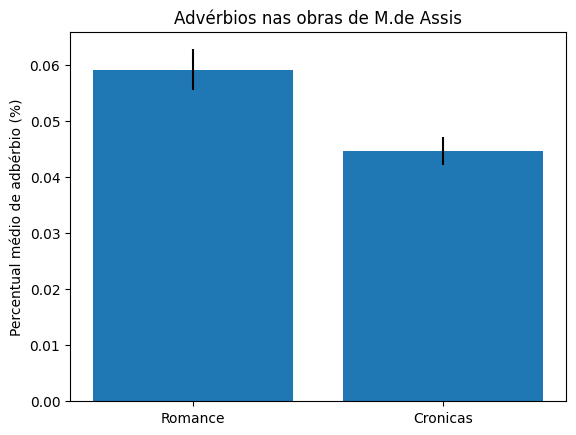

In [21]:
import matplotlib.pyplot as plt

tipo_obra = ["Romance", "Cronicas"]

x = [0, 1]
y = [rom_m, cron_m]
dp = [rom_dp, cron_dp]

plt.bar(x, y, yerr = dp)
plt.xticks(x, tipo_obra)
plt.ylabel("Percentual médio de adbérbio (%)")
plt.title("Advérbios nas obras de M.de Assis")

plt.show()